## Iris datasets example

Here is my first attempt at using Support Vector Machine learning using Iris sklearn data set.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris= load_iris()

In [2]:
dir(iris)
#Using Directory method we can see all the series that make up the Iris dataset that we have loaded from the SK Learn

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [7]:
iris['feature_names']
#Viewing the data within the Feature_names series of the iris dataset we have loaded.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df = pd.DataFrame(data= iris.data, columns=iris['feature_names'])
#Creating a dataframe using the data the collumns as the unique occurences 

In [11]:
#View the data frame
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['Target'] = iris.target
#Adding the column we want to predict

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df['Target Names'] = df['Target'].apply(lambda x: iris['target_names'][x])

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [28]:
#Visulising the dataset
import matplotlib.pyplot as plt
%matplotlib inline

Now we want to filter the data frame by the unique values of target

In [29]:
df0 = df[df['Target']==0]
df1 = df[df['Target']==1]
df2 = df[df['Target']==2]

In [33]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target Names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


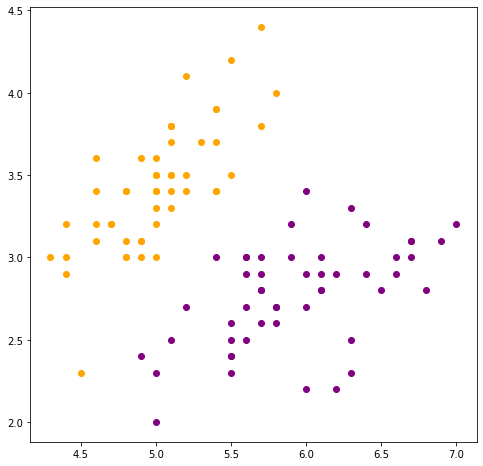

In [42]:
plt.subplots(figsize=(8,8))
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],c='Orange')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='Purple')
plt.xlabel('Sepal length (cm)')
plt.ylabel('')

In [43]:
from sklearn.model_selection import train_test_split
#Here I have imported the train test split model from sklearn. 

In [44]:
#x represents the features the model is train and test on. This excludes the columns
x = df.drop(['Target','Target Names'],axis=1)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
#Now we set y to be what we are trying to predict/ classify
y = df['Target']

In [47]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
#Here we are creating the x and y test and train versions of the dataframe.
#Test size refers to the percentage of data we want to test the model on.
#Here we are training the model on 80% of the data and testing on 20%

In [50]:
#Now we are fitting the model to the train data set
from sklearn.svm import SVC
Model = SVC()

In [51]:
Model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The higher the score the more accurate the fit for the model is. Using hte parameters displayed above we can adjust to improve the score.

In [53]:
Model.score(X_test,y_test)
#Here we use thge score method which will predict the Y/target value from the X_Test data set and compare it to y_test

0.9666666666666667